In [70]:
import tensorflow as tf
print(tf)

<module 'tensorflow' from '/home/festus/potato_training/venv/lib/python3.11/site-packages/tensorflow/__init__.py'>


In [71]:
from  tensorflow.keras import models,layers

In [72]:
import matplotlib.pyplot as plt

In [73]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [74]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [75]:
class_names=dataset.class_names

In [76]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [77]:
len(dataset)

68

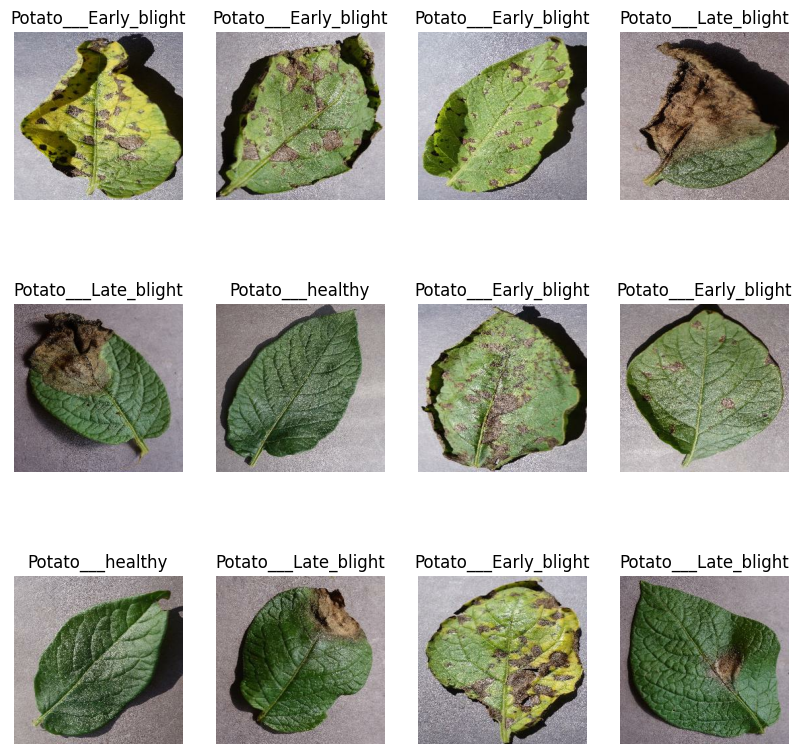

In [78]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")



In [79]:
len(dataset)

68

In [80]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [81]:
train_ds =  dataset.take(54)
len(train_ds)

54

In [82]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [83]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [84]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [85]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [86]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split * ds_size)
    val_size=int(val_split * ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds,test_ds


In [87]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [88]:
len(train_ds)

54

In [89]:
len(val_ds)

6

In [90]:
len(test_ds)

8

In [91]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [92]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [103]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'